In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
#loading the dataset into a dataframe
df = pd.read_csv('als_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#inspecting the data
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.

In [5]:
df.shape

(2223, 101)

In [6]:
#checking for null values
df.isna().sum().sum()

0

In [7]:
#1. Remove any data that is not relevant to the patient’s ALS condition.

In [8]:
#removing columns that are not relevant to the patient's ALS condition
df.drop(['ID', 'SubjectID'], axis=1, inplace=True)

In [9]:
#2. Apply a standard scalar to the data.

In [10]:
#initializing the scaler
scaler = StandardScaler()

#scaling the data
scaled_df = scaler.fit_transform(df)

In [11]:
#3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [12]:
#creating lists to store silhouette scores and num of clusters
num_of_clusters = []
silhouette_scores = []

#creating a for loop to try different number of clusters
for k in range(2, 11):
    
    #fitting KMeans cluster model
    kmeans = KMeans (n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    
    #calculating the silhouette score
    score = silhouette_score(scaled_df, labels)
    
    #appending the number of clusters and the scores
    num_of_clusters.append(k)
    silhouette_scores.append(score)

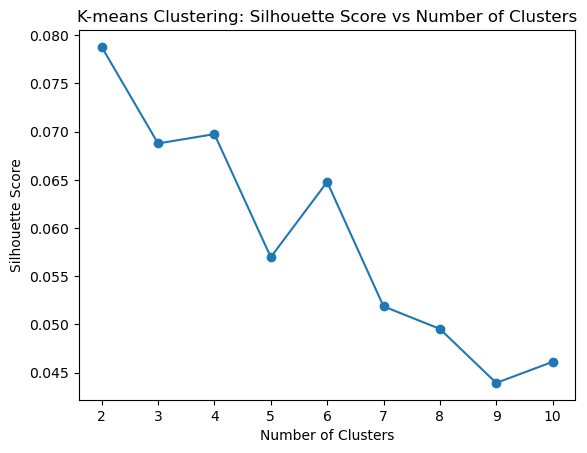

In [13]:
#generating the plot using matplotlib
plt.plot(num_of_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering: Silhouette Score vs Number of Clusters')
plt.show()

In [23]:
#4. Use the plot created in (3) to choose on optimal number of clusters for K-means. 

Based on the plot provided, the optimal number of clusters for K-means is 2. This number of clusters resulted in the highest silhouette score, which indicates that this is the number of clusters wherein the data are more well-clustered. The higher the mean silhouette score means the better the clustering of the data.

In [15]:
#5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [16]:
#setting the optimal number of clusters
optimal_cluster = 2

#fitting the KMeans clustering model with the optimal number of clusters
kmeans_opt = KMeans(n_clusters=optimal_cluster, random_state=42)
labels_opt = kmeans_opt.fit_predict(scaled_df)

In [17]:
#6. Fit a PCA transformation with two features to the scaled data.

In [18]:
#initializing PCA model with 2 features
pca = PCA(n_components=2)

#fitting the PCA transformation
pca_transformed = pca.fit_transform(scaled_df)

In [19]:
#7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

In [20]:
#creating a df for the plot
df_pca = pd.DataFrame({'PC1':pca_transformed[:, 0], 'PC2': pca_transformed[:, 1], 'Cluster':labels})

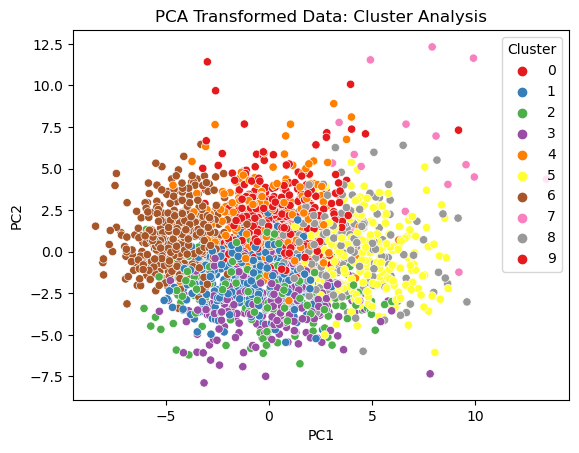

In [21]:
#generating the scatterplot using seaborn
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Transformed Data: Cluster Analysis')
plt.show()

In [22]:
#8. Summarize your results and make a conclusion.

The scatterplot shows the distribution of the clusters based on the features of the dataset. In the plot above, the clusters can be seen by the different colors assigned for each cluster or group. In terms of the ALS patients, the plot can provide insights regarding the characteristics or different subgroups of patients based on the features used for the anaysis.